# <font color='#d50283'>IT Academy - Data Science</font>
##  S10 T01: Aprenentatge Supervisat - Classificació
### Luis Ortas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

Utilizaremos el archivo: DelayedFlights.csv.

In [2]:
df = pd.read_csv("DelayedFlights.csv")

#df_ok=df.sample(100000)
df.drop(['Unnamed: 0','Year'],axis=1,inplace=True)

df.head(5)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,1,3,4,628.0,620,804.0,750,WN,448,N428WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


Para que sea más rapido. **Utilizaremos un solo destino. JFK**
Procesaremos el archivo.

In [3]:
# Solo contemplamo JFK. Eliminamos la columna "Dest"
df_NY=df.loc[df['Dest'] == 'JFK'].copy()
df_NY.drop(['Dest'],axis=1,inplace=True)

In [4]:
df_NY.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled',
       'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [5]:
df_NY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35506 entries, 41032 to 1936647
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              35506 non-null  int64  
 1   DayofMonth         35506 non-null  int64  
 2   DayOfWeek          35506 non-null  int64  
 3   DepTime            35506 non-null  float64
 4   CRSDepTime         35506 non-null  int64  
 5   ArrTime            35263 non-null  float64
 6   CRSArrTime         35506 non-null  int64  
 7   UniqueCarrier      35506 non-null  object 
 8   FlightNum          35506 non-null  int64  
 9   TailNum            35505 non-null  object 
 10  ActualElapsedTime  35234 non-null  float64
 11  CRSElapsedTime     35506 non-null  float64
 12  AirTime            35234 non-null  float64
 13  ArrDelay           35234 non-null  float64
 14  DepDelay           35506 non-null  float64
 15  Origin             35506 non-null  object 
 16  Distance        

In [6]:
df_NY.describe().T

,count,mean,std,min,25%,50%,75%,max
Month,35506.0,6.357489,3.312786,1.0,3.0,6.0,9.0,12.0
DayofMonth,35506.0,15.857799,8.792155,1.0,8.0,16.0,23.0,31.0
DayOfWeek,35506.0,4.040641,2.027000,1.0,2.0,4.0,6.0,7.0
DepTime,35506.0,1476.532502,494.858187,1.0,1159.0,1509.0,1838.0,2400.0
CRSDepTime,35506.0,1446.205571,444.700160,1.0,1135.0,1437.0,1750.0,2359.0
ArrTime,35263.0,1571.033321,640.768659,1.0,1246.0,1735.0,2054.0,2400.0
CRSArrTime,35506.0,1610.724300,539.423692,1.0,1354.0,1729.0,2015.0,2359.0
FlightNum,35506.0,1599.498169,2148.600795,1.0,96.0,624.0,1742.0,7339.0
ActualElapsedTime,35234.0,187.218738,90.861913,27.0,110.0,164.0,274.0,626.0
CRSElapsedTime,35506.0,186.054977,91.887637,21.0,100.0,165.0,282.0,536.0


In [7]:
df_NY[['Cancelled','Diverted']] = df_NY[['Cancelled','Diverted']].astype('bool')
#Eliminamos las filas donde Cancelled and diverted son verdad ya que ArrDelay es Nan.
# Eliminamos las columnas Canceled y Diverted.
df_NY.drop(df_NY[df.Cancelled  | df_NY.Diverted].index, inplace=True)
df_NY.drop(columns=['Cancelled', 'CancellationCode', 'Diverted'], inplace=True)

In [8]:
df_NY.isna().sum()

Month                   0
DayofMonth              0
DayOfWeek               0
DepTime                 0
CRSDepTime              0
ArrTime                 0
CRSArrTime              0
UniqueCarrier           0
FlightNum               0
TailNum                 1
ActualElapsedTime       0
CRSElapsedTime          0
AirTime                 0
ArrDelay                0
DepDelay                0
Origin                  0
Distance                0
TaxiIn                  0
TaxiOut                 0
CarrierDelay         9904
WeatherDelay         9904
NASDelay             9904
SecurityDelay        9904
LateAircraftDelay    9904
dtype: int64

In [9]:
#No utlilizaremos 'TailNum'
df_NY.drop(['TailNum'],axis=1,inplace=True)

In [10]:
df_NY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35234 entries, 41032 to 1936647
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              35234 non-null  int64  
 1   DayofMonth         35234 non-null  int64  
 2   DayOfWeek          35234 non-null  int64  
 3   DepTime            35234 non-null  float64
 4   CRSDepTime         35234 non-null  int64  
 5   ArrTime            35234 non-null  float64
 6   CRSArrTime         35234 non-null  int64  
 7   UniqueCarrier      35234 non-null  object 
 8   FlightNum          35234 non-null  int64  
 9   ActualElapsedTime  35234 non-null  float64
 10  CRSElapsedTime     35234 non-null  float64
 11  AirTime            35234 non-null  float64
 12  ArrDelay           35234 non-null  float64
 13  DepDelay           35234 non-null  float64
 14  Origin             35234 non-null  object 
 15  Distance           35234 non-null  int64  
 16  TaxiIn          

In [11]:
df_NY.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin',
       'Distance', 'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [12]:
# columnas categoricas y columnas numericas

num=['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 
       'Distance', 'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
cat=['Origin','UniqueCarrier']

In [13]:
# Eliminamos nulos

for i in num:
    df_NY[i].fillna(df_NY[i].median(), inplace = True)
    
df_NY.isna().sum()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Distance             0
TaxiIn               0
TaxiOut              0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

Definimos 'LAbel', la categoria de retraso

In [14]:
df_NY['Label'] = np.where(df_NY['ArrDelay'] > 0, 1, 0)

In [15]:
df_NY.Label.value_counts()

1    31170
0     4064
Name: Label, dtype: int64

#### O retrasado tiene muchos menos elementos que 1.

In [16]:
num=['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 
       'Distance', 'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay','Label']

In [17]:
df_vuelos=df_NY[num].copy()
df_vuelos.drop(['Label'],axis=1,inplace=True)

In [18]:
df_vuelos.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime',
       'ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

#### Utilizaremos el VIF variance_inflation_factor para eliminar las categorias que son dependientes entre ellas.

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def regular_vif(df,vif_max):
    vif_max=11
    columnas_eliminadas=[]
    while vif_max>10:
        vif = pd.DataFrame()
        vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
        vif["variables"] = df.columns
        vif=vif.sort_values(by='VIF',ascending=False)

        vif_max=vif.VIF.max()
        columnas_eliminadas.append(vif.variables.iloc[0])
    
        df.drop(columns=[vif.variables.iloc[0]],inplace=True)
    print(f'Columna eliminadas {columnas_eliminadas}')
    print(vif.variables.values.tolist())
   
    return (vif)

In [20]:
regular_vif(df_vuelos,11)

Columna eliminadas ['ArrDelay', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime', 'DepDelay', 'DepTime', 'CRSArrTime', 'CRSDepTime']
['CRSDepTime', 'ArrTime', 'DayOfWeek', 'Month', 'DayofMonth', 'TaxiOut', 'Distance', 'TaxiIn', 'NASDelay', 'LateAircraftDelay', 'CarrierDelay', 'WeatherDelay', 'SecurityDelay']


,VIF,variables
3,8.174893,CRSDepTime
4,6.020288,ArrTime
2,4.536194,DayOfWeek
0,4.334910,Month
1,3.943518,DayofMonth
7,3.446430,TaxiOut
5,2.700978,Distance
6,2.573044,TaxiIn
10,1.716343,NASDelay
12,1.239015,LateAircraftDelay


In [21]:
df_vuelos


,Month,DayofMonth,DayOfWeek,ArrTime,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
41032,1,1,2,1135.0,541,17.0,14.0,17.0,0.0,0.0,0.0,0.0
41250,1,2,3,1155.0,541,4.0,29.0,37.0,0.0,0.0,0.0,0.0
41251,1,2,3,1611.0,541,8.0,14.0,0.0,0.0,55.0,0.0,0.0
41515,1,3,4,1550.0,541,7.0,27.0,34.0,0.0,0.0,0.0,0.0
41683,1,4,5,1235.0,541,4.0,21.0,77.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1936626,12,13,6,1529.0,760,9.0,20.0,0.0,0.0,24.0,0.0,0.0
1936629,12,13,6,2203.0,2475,11.0,17.0,2.0,0.0,0.0,0.0,28.0
1936631,12,13,6,2358.0,760,12.0,14.0,0.0,0.0,14.0,0.0,0.0
1936637,12,13,6,1811.0,1597,11.0,18.0,0.0,0.0,14.0,0.0,0.0


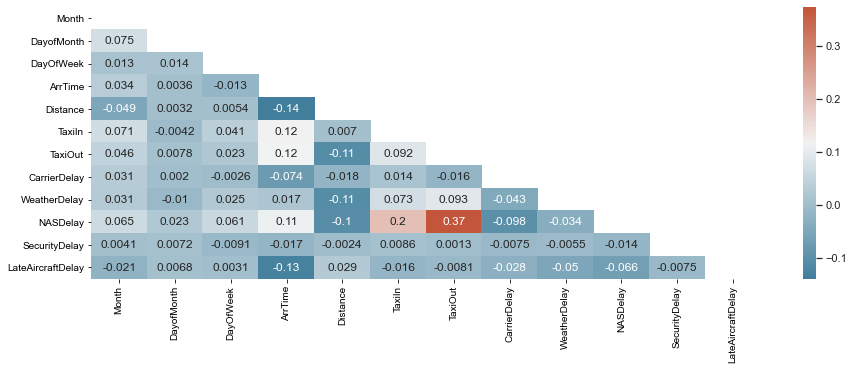

In [22]:
fig,ax = plt.subplots(figsize=(15,5))
corr = df_vuelos.corr()
sns.set_theme(style="white")
cmap = sns.diverging_palette(230, 20, as_cmap=True)

matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix, cmap=cmap)
plt.show()

In [23]:
## incluimos DepDelay ya que lo quitaremos posteriormente
df_vuelos['DepDelay']=df_NY['DepDelay']
df_vuelos['Label']=df_NY['Label']

Trabajaremos la descompesación de los valores

In [25]:
# Añadimos label
df_vuelos['Label']=df_NY['Label']

In [28]:

df_sac=df_vuelos.sample(frac=1,random_state=42)
grupo1=df_sac[df_sac.Label==0]
grupo2=df_sac[df_sac.Label==1].sample(n=len(grupo1),random_state=42)

# compensado.
df_equi = pd.concat([grupo1, grupo2])

In [29]:
print(grupo1.shape)
print(grupo2.shape)
print(df_equi.shape)

(4064, 14)
(4064, 14)
(8128, 14)


***
## Exercici 1
Crea almenys tres models de classificació diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv. Considera si el vol ha arribat tard o no (ArrDelay > 0).

In [ ]:
# trabajamos con el df df_equi
# separamos Label
X = df_equi.drop('Label',axis=1)
y = df_equi['Label']
#Train 70%, test 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
## escalamos los valores

scaler = StandardScaler()

X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)

**Decision Tree**

In [32]:
model1 = DecisionTreeClassifier(criterion='gini', splitter='random')
model1 = model1.fit(X_train,y_train)
y_pred1 = model1.predict(X_test)

**K-Nearest Neighbors classifier**

In [33]:
model2 = KNeighborsClassifier()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

#### Support vector machine classifier

In [34]:
model3 = svm.SVC()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

#### Logistic classifier

In [38]:
model4 = LogisticRegression()
model4.fit(X_train,y_train)
y_pred4 = model4.predict(X_test)

#### XGBoost classifier

In [39]:
model5 = xgb.XGBClassifier(objective='reg:logistic')
model5.fit(X_train,y_train)
predictions = model5.predict(X_test)
y_pred5 = [round(value) for value in predictions]

***
## Exercici 2
Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confiança i d’altres mètriques més avançades.

In [40]:
print('Accuracy decision tree model:',round(metrics.accuracy_score(y_test, y_pred1),2)*100,'%')
print('Accuracy KNN model:',round(metrics.accuracy_score(y_test, y_pred2),2)*100,'%')
print('Accuracy SVM model:',round(metrics.accuracy_score(y_test, y_pred3),2)*100,'%')
print('Accuracy Logistic model:',round(metrics.accuracy_score(y_test, y_pred4),2)*100,'%')
print('Accuracy XGBoost model:',round(metrics.accuracy_score(y_test, y_pred5),2)*100,'%')

Accuracy decision tree model: 84.0 %
Accuracy KNN model: 81.0 %
Accuracy SVM model: 71.0 %
Accuracy Logistic model: 87.0 %
Accuracy XGBoost model: 90.0 %


In [42]:
m1 = metrics.confusion_matrix(y_test, y_pred1)
m2 = metrics.confusion_matrix(y_test, y_pred2)
m3 = metrics.confusion_matrix(y_test, y_pred3)
m4 = metrics.confusion_matrix(y_test, y_pred4)
m5 = metrics.confusion_matrix(y_test, y_pred5)

print('Matrix decision tree model:',m1)
print('Matrix KNN model:',m2)
print('Matrix SVM model:',m3)
print('Matrix model:',m4)
print('Matrix XGBoost model:',m5)

Matrix decision tree model: [[1017  209]
 [ 184 1029]]
Matrix KNN model: [[1134   92]
 [ 364  849]]
Matrix SVM model: [[1018  208]
 [ 489  724]]
Matrix model: [[1132   94]
 [ 216  997]]
Matrix XGBoost model: [[1155   71]
 [ 181 1032]]


In [41]:
m1 = metrics.confusion_matrix(y_test, y_pred1)
m2 = metrics.confusion_matrix(y_test, y_pred2)
m3 = metrics.confusion_matrix(y_test, y_pred3)
m4 = metrics.confusion_matrix(y_test, y_pred4)
m5 = metrics.confusion_matrix(y_test, y_pred5)

print('Matrix decision tree model:',m1)
print('Matrix KNN model:',m2)
print('Matrix SVM model:',m3)
print('Matrix model:',m4)
print('Matrix XGBoost model:',m5)

Matrix decision tree model: [[1017  209]
 [ 184 1029]]
Matrix KNN model: [[1134   92]
 [ 364  849]]
Matrix SVM model: [[1018  208]
 [ 489  724]]
Matrix model: [[1132   94]
 [ 216  997]]
Matrix XGBoost model: [[1155   71]
 [ 181 1032]]


#### Matriz de confusión

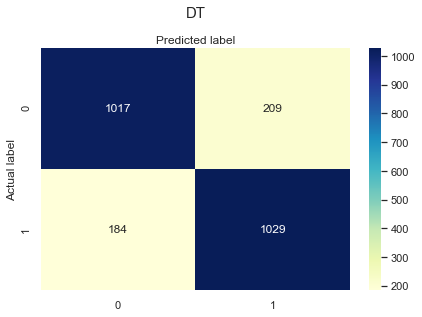

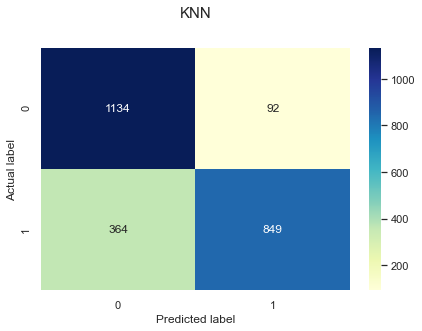

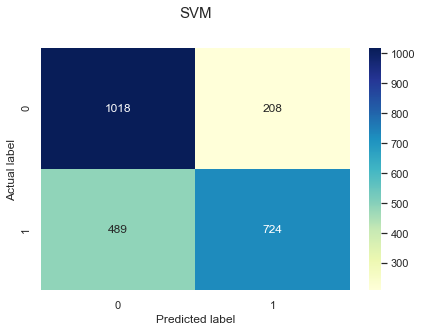

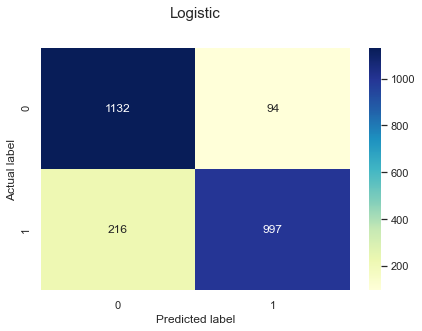

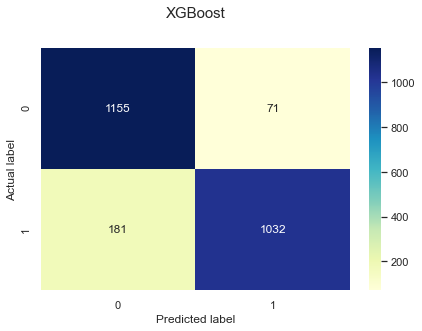

In [43]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap


dicc = {'DT': m1, 'KNN': m2, 'SVM': m3, 'Logistic': m4, 'XGBoost': m5}

model = dicc.keys()

for m in model:
    sns.heatmap(pd.DataFrame(dicc[m]), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title(m, y=1.1,fontsize = 15)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

In [44]:
#sensitivity TP / (TP + FN)
s1 = m1[1,1] / (m1[1,1] + m1[1,0])
s2 = m2[1,1] / (m2[1,1] + m2[1,0])
s3 = m3[1,1] / (m3[1,1] + m3[1,0])
s4 = m4[1,1] / (m4[1,1] + m4[1,0])
s5 = m5[1,1] / (m5[1,1] + m5[1,0])

print('Sensitivity decision tree model:',s1)
print('Sensitivity KNN model:',s2)
print('Sensitivity SVM model:',s3)
print('Sensitivity Logistic model:',s4)
print('Sensitivity XGBoost model:',s5)

Sensitivity decision tree model: 0.8483099752679307
Sensitivity KNN model: 0.6999175597691674
Sensitivity SVM model: 0.5968672712283595
Sensitivity Logistic model: 0.8219291014014839
Sensitivity XGBoost model: 0.8507831821929102


In [45]:
f1 = f1_score(y_test, y_pred1)
f2 = f1_score(y_test, y_pred2)
f3 = f1_score(y_test, y_pred3)
f4 = f1_score(y_test, y_pred4)
f5 = f1_score(y_test, y_pred5)

print('F1 score decision tree model:',f1)
print('F1 score KNN model:',f2)
print('F1 score SVM model:',f3)
print('F1 score Logistic model:',f4)
print('F1 score XGBoost model:',f5)

F1 score decision tree model: 0.8396572827417381
F1 score KNN model: 0.7883008356545961
F1 score SVM model: 0.6750582750582751
F1 score Logistic model: 0.865451388888889
F1 score XGBoost model: 0.8911917098445596


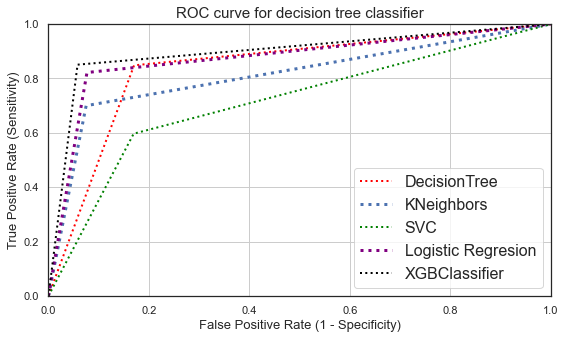

In [57]:
#ROC - summarizes the performance of the decision tree model at different threshold values
fig,ax = plt.subplots(figsize=(9,5))
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, y_pred1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, y_pred2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_test, y_pred3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(y_test, y_pred4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(y_test, y_pred5)

plt.plot(fpr1, tpr1,"b:", linewidth=2,color='red', label="DecisionTree")
plt.plot(fpr2, tpr2,"b:", linewidth=3, label="KNeighbors")
plt.plot(fpr3, tpr3,"b:", linewidth=2,color='green', label="SVC")
plt.plot(fpr4, tpr4,"b:", linewidth=3,color='purple', label="Logistic Regresion")
plt.plot(fpr5, tpr5,"b:", linewidth=2,color='black', label="XGBClassifier")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 13
plt.title('ROC curve for decision tree classifier', fontsize = 15)
plt.xlabel('False Positive Rate (1 - Specificity)',fontsize = 13)
plt.ylabel('True Positive Rate (Sensitivity)',fontsize = 13)
plt.legend(loc="lower right", fontsize=16)
plt.grid(True)

In [80]:
dicc = {'DT': [y_pred1,m1,fpr1, tpr1,thresholds1], 'KNN': [y_pred2,m2,fpr2, tpr2,thresholds2], 
        'SVM': [y_pred3,m3,fpr3, tpr3,thresholds3], 'Logistic': [y_pred4,m4,fpr4, tpr4,thresholds4]
        , 'XGBoost': [y_pred5,m5,fpr5, tpr5,thresholds5]}

model=dicc.keys()

def limite(limite):
    for m in model:
        print(f'________ {m}________\n')
        
        print(f'{limite} :')
        print('Sensitivity:', dicc[m][3][dicc[m][4] > limite][-1])
        print('Specificity:', 1 - dicc[m][2][dicc[m][4]> limite][-1])
        
        #AUC - area under the curve
        print(f'AUC of {m} model:',round(metrics.roc_auc_score(y_test, dicc[m][0]),2)*100,'%')
        
        
        print(" ")
        
        
        
        
        


In [81]:
limite(0.5)

________ DT________

0.5 :
Sensitivity: 0.8483099752679307
Specificity: 0.8295269168026101
AUC of DT model: 84.0 %
 
________ KNN________

0.5 :
Sensitivity: 0.6999175597691674
Specificity: 0.9249592169657422
AUC of KNN model: 81.0 %
 
________ SVM________

0.5 :
Sensitivity: 0.5968672712283595
Specificity: 0.8303425774877651
AUC of SVM model: 71.0 %
 
________ Logistic________

0.5 :
Sensitivity: 0.8219291014014839
Specificity: 0.9233278955954323
AUC of Logistic model: 87.0 %
 
________ XGBoost________

0.5 :
Sensitivity: 0.8507831821929102
Specificity: 0.9420880913539967
AUC of XGBoost model: 90.0 %
 


***
## Exercici 3
Entrena’ls utilitzant els diferents paràmetres que admeten.

#### probamos diferentes parametros

#### Decision Tree

In [88]:
model6 = DecisionTreeClassifier(criterion='entropy', splitter='best')
model6 = model6.fit(X_train,y_train)
y_pred6 = model6.predict(X_test)

#### K-Nearest Neighbors classifie

In [89]:
model7 = KNeighborsClassifier(n_neighbors=1, weights='distance',leaf_size=50)
model7.fit(X_train, y_train)
y_pred7 = model7.predict(X_test)

#### Support vector machine classifier

In [90]:
model8 = svm.SVC(kernel='poly',degree=3, coef0=1.0, C=5)# porbablemete c5
model8.fit(X_train, y_train)
y_pred8 = model8.predict(X_test)

#### Logistic classifier

In [91]:
model9 = LogisticRegression(class_weight='balanced',solver= 'newton-cg', multi_class='multinomial', random_state=42)
model9.fit(X_train,y_train)
y_pred9 = model9.predict(X_test)

#### XGBoost classifier

In [92]:
model10 = xgb.XGBClassifier(colsample_bytree=0.3,learning_rate=0.1,max_depth=10,n_estimators=100,objective='reg:logistic')
model10.fit(X_train,y_train)
predictions = model10.predict(X_test)
y_pred10 = [round(value) for value in predictions]

***
## Exercici 4
Compara el seu rendiment utilitzant l’aproximació traint/test o cross-validation

In [93]:
#comparing f1_scores
f6 = f1_score(y_test, y_pred6)
f7 = f1_score(y_test, y_pred7)
f8 = f1_score(y_test, y_pred8)
f9 = f1_score(y_test, y_pred9)
f10 = f1_score(y_test, y_pred10)

d1 = {'DT': f1, 'KNN': f2, 'SVM': f3, 'Logistic': f4, 'XGBoost': f5}
class1 = pd.Series(data=d1, index=['DT', 'KNN', 'SVM', 'Logistic', 'XGBoost'])

d2 = {'DT': f6, 'KNN': f7, 'SVM': f8, 'Logistic': f9, 'XGBoost': f10}
class2 = pd.Series(data=d2, index=['DT', 'KNN', 'SVM', 'Logistic', 'XGBoost'])

df_class = pd.DataFrame({'First F1_score':class1, 'Second F1_score':class2})
df_class

,First F1_score,Second F1_score
DT,0.839657,0.858906
KNN,0.788301,0.824046
SVM,0.675058,0.851244
Logistic,0.865451,0.893750
XGBoost,0.891192,0.899197


In [98]:
#Cross-validation
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

scores1 = cross_val_score(model1, X_test, y_test, cv=cv)
scores2 = cross_val_score(model2, X_test, y_test, cv=cv)
scores3 = cross_val_score(model3, X_test, y_test, cv=cv)
scores4 = cross_val_score(model4, X_test, y_test, cv=cv)
scores5 = cross_val_score(model5, X_test, y_test, cv=cv)

print(" Decision tree classifier has %0.2f accuracy with a standard deviation of %0.2f" % (scores1.mean(), scores1.std()))
print(" KNN classifier has %0.2f accuracy with a standard deviation of %0.2f" % (scores2.mean(), scores2.std()))
print(" SVM classifier has %0.2f accuracy with a standard deviation of %0.2f" % (scores3.mean(), scores3.std()))
print(" Logistic classifier has %0.2f accuracy with a standard deviation of %0.2f" % (scores4.mean(), scores4.std()))
print(" XGBoost classifier has %0.2f accuracy with a standard deviation of %0.2f" % (scores5.mean(), scores5.std()))

 Decision tree classifier has 0.84 accuracy with a standard deviation of 0.01
 KNN classifier has 0.73 accuracy with a standard deviation of 0.01
 SVM classifier has 0.68 accuracy with a standard deviation of 0.01
 Logistic classifier has 0.88 accuracy with a standard deviation of 0.02
 XGBoost classifier has 0.89 accuracy with a standard deviation of 0.01


In [101]:
#Cross-validation
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

scores6 = cross_val_score(model6, X_test, y_test, cv=cv)
scores7 = cross_val_score(model7, X_test, y_test, cv=cv)
scores8 = cross_val_score(model8, X_test, y_test, cv=cv)
scores9 = cross_val_score(model9, X_test, y_test, cv=cv)
scores10 = cross_val_score(model10, X_test, y_test, cv=cv)

print(" Decision tree classifier has %0.2f accuracy with a standard deviation of %0.2f" % (scores6.mean(), scores1.std()))
print(" KNN classifier has %0.2f accuracy with a standard deviation of %0.2f" % (scores7.mean(), scores2.std()))
print(" SVM classifier has %0.2f accuracy with a standard deviation of %0.2f" % (scores8.mean(), scores3.std()))
print(" Logistic classifier has %0.2f accuracy with a standard deviation of %0.2f" % (scores9.mean(), scores4.std()))
print(" XGBoost classifier has %0.2f accuracy with a standard deviation of %0.2f" % (scores10.mean(), scores5.std()))

 Decision tree classifier has 0.86 accuracy with a standard deviation of 0.01
 KNN classifier has 0.79 accuracy with a standard deviation of 0.01
 SVM classifier has 0.84 accuracy with a standard deviation of 0.01
 Logistic classifier has 0.90 accuracy with a standard deviation of 0.02
 XGBoost classifier has 0.90 accuracy with a standard deviation of 0.01


***

## Exercici 5
Realitza algun procés d’enginyeria de variables per millorar-ne la predicció

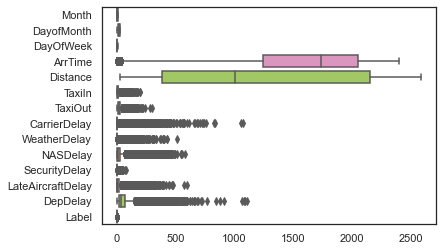

In [102]:
ax = sns.boxplot(data=df_vuelos, orient="h", palette="Set2")

#### Eliminaremos los outliers

In [103]:
df_prueba=df_equi.copy()



for v in df_prueba.columns:
   
    q1, q3= np.percentile(df_prueba[v],[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)
    median=df_prueba[v].median()
    print(f'{v},lower_bound { lower_bound}   upper_bound { upper_bound}')
    df_prueba[v] = df_prueba[v].mask(df_prueba[v] <lower_bound, median)
    df_prueba[v] = df_prueba[v].mask(df_prueba[v] >upper_bound, median)
   

Month,lower_bound -6.0   upper_bound 18.0
DayofMonth,lower_bound -14.5   upper_bound 45.5
DayOfWeek,lower_bound -4.0   upper_bound 12.0
ArrTime,lower_bound 54.125   upper_bound 3227.125
Distance,lower_bound -2019.5   upper_bound 4808.5
TaxiIn,lower_bound -5.5   upper_bound 22.5
TaxiOut,lower_bound -1.5   upper_bound 34.5
CarrierDelay,lower_bound 0.0   upper_bound 0.0
WeatherDelay,lower_bound 0.0   upper_bound 0.0
NASDelay,lower_bound 14.0   upper_bound 14.0
SecurityDelay,lower_bound 0.0   upper_bound 0.0
LateAircraftDelay,lower_bound 0.0   upper_bound 0.0
DepDelay,lower_bound -33.0   upper_bound 79.0
Label,lower_bound -1.5   upper_bound 2.5


<AxesSubplot:>

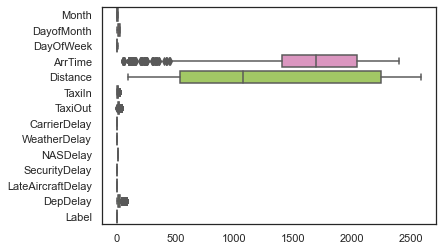

In [104]:
sns.boxplot(data=df_prueba, orient="h", palette="Set2")

In [105]:
X = df_prueba.drop('Label',axis=1)
y = df_prueba['Label']
#Train 70%, test 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [106]:
## escalamos los valores

scaler = StandardScaler()

X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)

In [107]:
model11 = DecisionTreeClassifier()
model11 = model11.fit(X_train,y_train)
y_pred11 = model11.predict(X_test)

In [108]:
model12 = KNeighborsClassifier(n_neighbors=1, weights='distance',leaf_size=50)
model12.fit(X_train, y_train)
y_pred12 = model12.predict(X_test)

In [109]:
model13 = svm.SVC(kernel='poly',degree=3, coef0=1.0, C=5)# porbablemete c5
model13.fit(X_train, y_train)
y_pred13 = model3.predict(X_test)

In [110]:
model14 = LogisticRegression()
model14.fit(X_train,y_train)
y_pred14 = model14.predict(X_test)

In [111]:
model15 = xgb.XGBClassifier(objective='reg:logistic')
model15.fit(X_train,y_train)
predictions = model15.predict(X_test)
y_pred15 = [round(value) for value in predictions]

In [112]:
##comparing f1_scores
f11 = f1_score(y_test, y_pred11)
f12 = f1_score(y_test, y_pred12)
f13 = f1_score(y_test, y_pred13)
f14 = f1_score(y_test, y_pred14)
f15 = f1_score(y_test, y_pred15)

d1 = {'DT': f1, 'KNN': f2, 'SVM': f3, 'Logistic': f4, 'XGBoost': f5}
class1 = pd.Series(data=d1, index=['DT', 'KNN', 'SVM', 'Logistic', 'XGBoost'])
d2 = {'DT': f6, 'KNN': f7, 'SVM': f8, 'Logistic': f9, 'XGBoost': f10}
class2 = pd.Series(data=d2, index=['DT', 'KNN', 'SVM', 'Logistic', 'XGBoost'])
d3 = {'DT': f11, 'KNN': f12, 'SVM': f13, 'Logistic': f14, 'XGBoost': f15}
class3 = pd.Series(data=d3, index=['DT', 'KNN', 'SVM', 'Logistic', 'XGBoost'])

df_class = pd.DataFrame({'First F1_score':class1, 'Second F1_score':class2, 'Third F1_score':class3})
df_class

,First F1_score,Second F1_score,Third F1_score
DT,0.839657,0.858906,0.779910
KNN,0.788301,0.824046,0.766307
SVM,0.675058,0.851244,0.506624
Logistic,0.865451,0.893750,0.763293
XGBoost,0.891192,0.899197,0.834820


***

## Exercici 6
No utilitzis la variable DepDelay a l’hora de fer prediccions

In [113]:
df_fin=df_equi.copy()
df_fin.drop(['ArrTime'],axis=1,inplace=True)

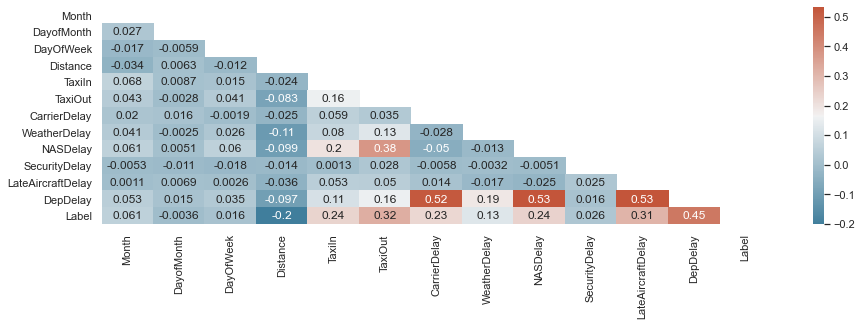

In [115]:
#Correlation matrix
fig,ax = plt.subplots(figsize=(15,4))
corr = df_fin.corr()
sns.set_theme(style="white")
cmap = sns.diverging_palette(230, 20, as_cmap=True)

matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix, cmap=cmap)
plt.show()

In [116]:
X = df_fin.drop('Label',axis=1)
y = df_fin['Label']
#Train 70%, test 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [117]:
#scaling the values
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [118]:
model16 = DecisionTreeClassifier()
model16 = model16.fit(X_train,y_train)
y_pred16 = model16.predict(X_test)

In [119]:
model17 = KNeighborsClassifier(n_neighbors=1, weights='distance',leaf_size=50)
model17.fit(X_train, y_train)
y_pred17 = model17.predict(X_test)

In [120]:
model18 = svm.SVC(kernel='linear', coef0=1.0, random_state=42)
model18.fit(X_train, y_train)
y_pred18 = model18.predict(X_test)

In [121]:
model19 = LogisticRegression()
model19.fit(X_train,y_train)
y_pred19 = model19.predict(X_test)

In [122]:
model20 = xgb.XGBClassifier(objective='reg:logistic')
model20.fit(X_train,y_train)
predictions = model20.predict(X_test)
y_pred20 = [round(value) for value in predictions]

In [123]:
#comparing f1_scores
f16 = f1_score(y_test, y_pred16)
f17 = f1_score(y_test, y_pred17)
f18 = f1_score(y_test, y_pred18)
f19 = f1_score(y_test, y_pred19)
f20 = f1_score(y_test, y_pred20)

d1 = {'DT': f1, 'KNN': f2, 'SVM': f3, 'Logistic': f4, 'XGBoost': f5}
class1 = pd.Series(data=d1, index=['DT', 'KNN', 'SVM', 'Logistic', 'XGBoost'])
d2 = {'DT': f6, 'KNN': f7, 'SVM': f8, 'Logistic': f9, 'XGBoost': f10}
class2 = pd.Series(data=d2, index=['DT', 'KNN', 'SVM', 'Logistic', 'XGBoost'])
d3 = {'DT': f11, 'KNN': f12, 'SVM': f13, 'Logistic': f14, 'XGBoost': f15}
class3 = pd.Series(data=d3, index=['DT', 'KNN', 'SVM', 'Logistic', 'XGBoost'])
d4 = {'DT': f16, 'KNN': f17, 'SVM': f18, 'Logistic': f19, 'XGBoost': f20}
class4 = pd.Series(data=d4, index=['DT', 'KNN', 'SVM', 'Logistic', 'XGBoost'])

df_class = pd.DataFrame({'First F1_score':class1, 'Second F1_score':class2,
                         'Third F1_score':class3,'Fourth F1_score':class4, })
df_class

,First F1_score,Second F1_score,Third F1_score,Fourth F1_score
DT,0.839657,0.858906,0.779910,0.836349
KNN,0.788301,0.824046,0.766307,0.788660
SVM,0.675058,0.851244,0.506624,0.879963
Logistic,0.865451,0.893750,0.763293,0.886700
XGBoost,0.891192,0.899197,0.834820,0.886874


## Ejercicio Extra

In [ ]:
#precision TP / (TP + FP)
p1 = m1[1,1] / (m1[1,1] + m1[0,1])
p2 = m2[1,1] / (m2[1,1] + m2[0,1])
p3 = m3[1,1] / (m3[1,1] + m3[0,1])
p4 = m4[1,1] / (m4[1,1] + m4[0,1])
p5 = m5[1,1] / (m5[1,1] + m5[0,1])

print('Precision decision tree model:',p1)
print('Precision KNN model:',p2)
print('Precision SVM model:',p3)
print('Precision Logistic model:',p4)
print('Precision XGBoost model:',p5)

In [124]:
from imblearn.over_sampling import SMOTE
from keras.utils import np_utils
X = df_vuelos.drop('Label',axis=1)
y = df_vuelos['Label']

#test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)
sm = SMOTE(random_state=27)
X_train, y_train = sm.fit_resample(X_train, y_train)  ### oju resample

In [125]:
smote = LogisticRegression(solver='liblinear').fit(X_train, y_train)
smote_pred = smote.predict(X_test)

a = metrics.accuracy_score(y_test, smote_pred)
b = f1_score(y_test, smote_pred)
print(a,b)

0.8547914104625863 0.9106467198323535


El método SMOTE mejoró significativamente el modelo logístico comparando el resultado con algoritmos anteriores. 
Otro método sería el submuestreo o el sobremuestreo. En este gran conjunto de datos, sería apropiado usar submuestreo, que ya se aplicó en pasos anteriores. 
SMOTE: generar las muestras sintéticas parece ser la mejor manera de lidiar con un conjunto de datos desequilibrado.